# Distribution of order parameter

In [1]:
import numpy as np, glob
import matplotlib.pylab as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/gk/bdqkskqj2fv8dk9kgrxm5psh0000gn/T/ipykernel_74443/1018117210.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


### Overlap between distributions

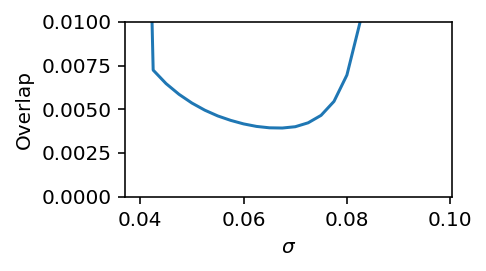

In [5]:
data=np.loadtxt('results.txt')
plt.figure(figsize=(3.4,2))
plt.plot(data[:,0],data[:,1])
plt.xlabel(r'$\sigma$')
plt.ylabel('Overlap')
plt.ylim([0,0.01])

plt.tight_layout()

In [6]:
sigma_min=data[data[:,1]==min(data[:,1])][0][0]
print('Minimum overlap for sigma = {}'.format(sigma_min))

Minimum overlap for sigma = 0.0675


### Distributions

In [14]:
hist_liquid = np.loadtxt('Liquid_4000bar/Histo_{}'.format(sigma_min))
hist_IceIII = np.loadtxt('IceIII_4000bar/Histo_{}'.format(sigma_min))


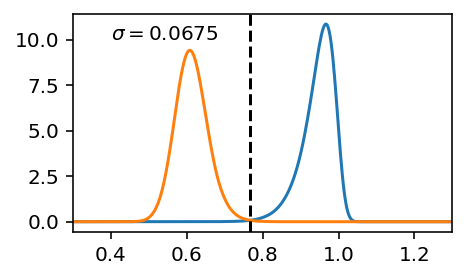

In [15]:
plt.figure(figsize=(3.4,2))
plt.plot(hist_IceIII[:,0],hist_IceIII[:,1])
plt.plot(hist_liquid[:,0],hist_liquid[:,1])
plt.xlim([0.3,1.3])
plt.annotate(r'$\sigma={}$'.format(sigma_min),(0.4,10))

diff_val = np.abs(hist_liquid[:,1]-hist_IceIII[:,1])
diff_bin = hist_liquid[:,0]
diff_val = diff_val[(diff_bin>0.65) * (diff_bin<1.05)]
diff_bin = diff_bin[(diff_bin>0.65) * (diff_bin<1.05)]

min_order= diff_bin[diff_val.min()==diff_val]
plt.axvline(x=min_order, color='k', linestyle='--')

In [16]:
print('Liquid max:', hist_liquid[hist_liquid[:,1]==hist_liquid[:,1].max()][0][0])

Liquid max: 0.6075


In [17]:
print('IceIII max:', hist_IceIII[hist_IceIII[:,1]==hist_IceIII[:,1].max()][0][0])

IceIII max: 0.9675


In [18]:
print('Midpoint between distribitions:', min_order[0])

Midpoint between distribitions: 0.7675


## Effect of pressure on overlap

overlap_5000bar.dat 0.065
overlap_4000bar.dat 0.0675
overlap_3000bar.dat 0.0675
overlap_2500bar.dat 0.0675


(0.0, 0.1)

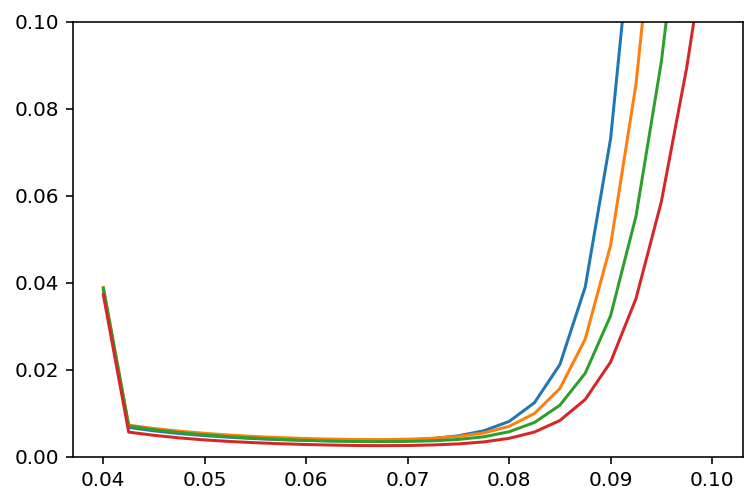

In [19]:
bars=set()
#overlaps=[]
for f in glob.glob('overlap*'):
    #try:
    data=np.loadtxt(f)
    #except:
     #   continue
    sigma_min=data[data[:,1]==min(data[:,1])][0][0]
    bars.add((f.split('/')[-1].replace('overlap_','').replace('.dat',''),sigma_min))
    print(f,sigma_min)
    #overlaps.append()
    plt.plot(data[:,0],data[:,1])
plt.ylim([0,0.1])

In [20]:
print(bars)
hist_liquid = np.loadtxt('Liquid/histo')
hist_IceIII = np.loadtxt('IceIII/histo')


{('2500bar', 0.0675), ('3000bar', 0.0675), ('4000bar', 0.0675), ('5000bar', 0.065)}


In [21]:
def remove_0(hist):
    return hist[hist[:,1]>0.001]

IceIII_2500bar/Histo_0.0625
Liquid max: 0.49
IceIII max: 0.92
Midpoint between distribitions: 0.67
IceIII_3000bar/Histo_0.0625
Liquid max: 0.5
IceIII max: 0.9225
Midpoint between distribitions: 0.6775
IceIII_4000bar/Histo_0.0625
Liquid max: 0.5075
IceIII max: 0.9225
Midpoint between distribitions: 0.685
IceIII_5000bar/Histo_0.0625
Liquid max: 0.5175
IceIII max: 0.9225
Midpoint between distribitions: 0.685
Liquid max: 0.504
IceIII max: 0.922
Midpoint: 0.679


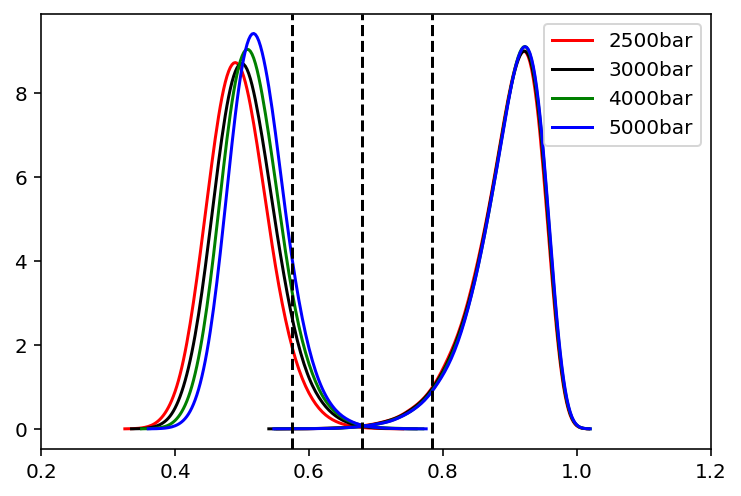

In [22]:
#Final choice
sig=0.0625

colors=['r','k','g','b']
means=[]
for i, bar in enumerate(bars):
    #hist_liquid = np.loadtxt('Liquid_{}/Histo'.format(bar[0]))
    #hist_IceIII = np.loadtxt('IceIII_{}/Histo_{:.4}'.format(bar[0]))

    
    hist_IceIII=np.loadtxt('IceIII_{}/Histo_{:.4f}'.format(bar[0],sig))
    hist_Liquid=np.loadtxt('Liquid_{}/Histo_{:.4f}'.format(bar[0],sig))
    diff_val = np.abs(hist_Liquid[:,1]-hist_IceIII[:,1])
    diff_bin = hist_liquid[:,0]
    diff_val = diff_val[(diff_bin>0.5) * (diff_bin<1.0)]
    diff_bin = diff_bin[(diff_bin>0.5) * (diff_bin<1.0)]

    hist_IceIII=remove_0(hist_IceIII)
    hist_Liquid=remove_0(hist_Liquid)
    print('IceIII_{}/Histo_{:.4f}'.format(bar[0],sig))
    print('Liquid max:', hist_Liquid[hist_Liquid[:,1]==hist_Liquid[:,1].max()][0][0])
    print('IceIII max:', hist_IceIII[hist_IceIII[:,1]==hist_IceIII[:,1].max()][0][0])
    min_order= diff_bin[diff_val.min()==diff_val]
    print('Midpoint between distribitions:', min_order[0])
    plt.plot(hist_IceIII[:,0],hist_IceIII[:,1],color=colors[i],label=bar[0])
    plt.plot(hist_Liquid[:,0],hist_Liquid[:,1],color=colors[i])
    means.append([hist_Liquid[hist_Liquid[:,1]==hist_Liquid[:,1].max()][0][0], hist_IceIII[hist_IceIII[:,1]==hist_IceIII[:,1].max()][0][0],min_order[0]])

plt.xlim([0.2,1.2])
means=np.mean(means,axis=0)
print('Liquid max: {:.3f}'.format(means[0]))
print('IceIII max: {:.3f}'.format(means[1]))
print('Midpoint: {:.3f}'.format(means[2]))

dist=0.25*(means[1]-means[0])
plt.axvline(x=means[2],ls='--',color='k')
plt.axvline(x=means[2]+dist,ls='--',color='k')
plt.axvline(x=means[2]-dist,ls='--',color='k')
#print(means[2]+0.125)
#print(means[2]-0.125)
#print(means[2]+dist)
#print(means[2]-dist)
plt.legend()


In [23]:
def func(r,r0,r1):
    y=(r-r0)/(r1-r0)
    ret=r*0
    ret[r>r0]=(y[r>r0] - 1)**2*(1 +2*y[r>r0])
    ret[r>r1]=1.0
    print(ret)
    return ret

In [24]:
A=np.genfromtxt('IceIII_2500bar/COLVAR_0.0550')
B=np.genfromtxt('Liquid_2500bar/COLVAR_0.0550')
B=np.array((B[:,1],B[:,1]*0)).T
A=np.array((A[:,1],A[:,1]*0+1)).T

In [25]:
full=np.vstack((A,B))
print(full)

[[0.99298  1.      ]
 [0.83328  1.      ]
 [0.826906 1.      ]
 ...
 [0.373236 0.      ]
 [0.379204 0.      ]
 [0.375259 0.      ]]


In [26]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, full[:,0], full[:,1],p0=[0.3,0.6])

[1.         1.         1.         ... 0.85031273 0.82769594 0.84277763]
[1.         1.         1.         ... 0.85031273 0.82769594 0.84277763]
[1.         1.         1.         ... 0.85031273 0.82769594 0.84277763]
[1.         1.         1.         ... 0.85031274 0.82769596 0.84277765]
[1.         1.         1.         ... 0.85031274 0.82769595 0.84277764]
[0.00215952 0.07173697 0.07628376 ... 0.58635276 0.57877999 0.58378774]
[1. 1. 1. ... 1. 1. 1.]
[1.         1.         1.         ... 0.39902088 0.35831325 0.38513818]
[1.         1.         1.         ... 0.39902089 0.35831326 0.38513819]
[1.         1.         1.         ... 0.39902091 0.35831328 0.38513821]
[1.         1.         1.         ... 0.18076953 0.16130238 0.17408157]
[1.         1.         1.         ... 0.18076953 0.16130238 0.17408157]
[1.         1.         1.         ... 0.18076954 0.16130239 0.17408158]
[1.         1.         1.         ... 0.08404755 0.07528442 0.08103145]
[1.         1.         1.         ... 0.

In [27]:
print(popt)

[-3.32743145e+06  4.08825048e-01]


[4.52874502e-14 4.09222912e-14 3.67783001e-14 3.28554772e-14
 2.91538223e-14 2.56733354e-14 2.24140167e-14 1.93758660e-14
 1.65588834e-14 1.39630688e-14 1.15884224e-14 9.43494404e-15
 7.50263378e-15 5.79149155e-15 4.30151745e-15 3.03271147e-15
 1.98507356e-15 1.15860377e-15 5.53302072e-16 1.69168487e-16
 6.20300465e-18 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.000000

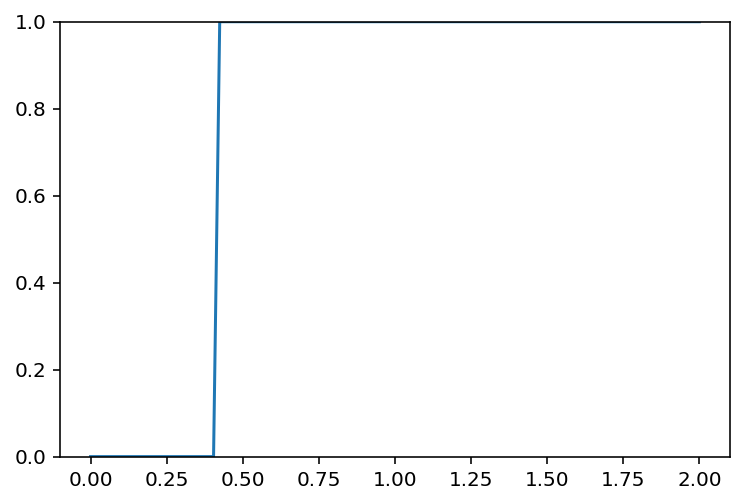

In [28]:
x=np.linspace(0,2,100)
plt.ylim([0,1])
plt.plot(x,func(x,*popt))

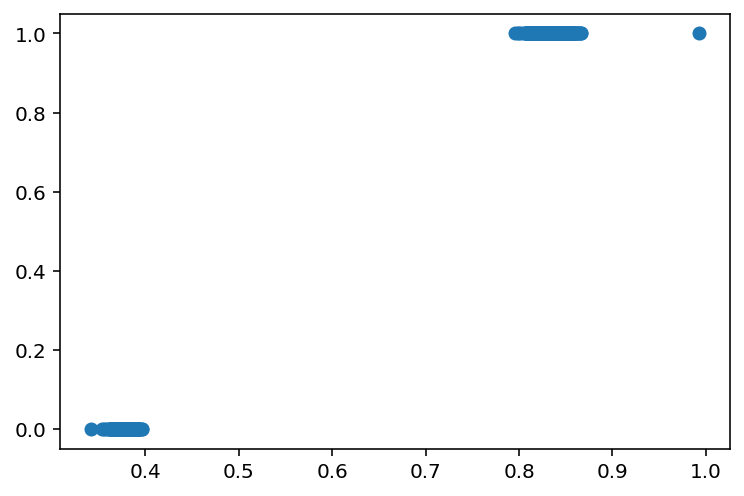

In [29]:
plt.scatter(full[:,0],full[:,1])